## Evaluating Machine Learning Models to Predict the Relationship Status of High School Students

**Framing the business needs**

Let us assume the Government of Portugal wants us to predict if a student will be (or is in) a romantic relationship as they are attempting to educate a certain amount of young teenagers on healthy relationships and government-sponsored services (e.g. professional doctors providing advice on intercourse). They are limited on resources and want us to directly pick which students to send informational packages to.

While the situation sounds silly, having an objective will help us while we look at the confusion matrix later.

We will use Pandas and NumPy to assist in working with the data and Scikit-Learn to compute the machine learning models

In [2]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

### Preparation of Data

In [3]:
df = pd.read_csv("C:/Users/Kevin/Desktop/Dropbox/Dropbox/student/student-mat.csv", delimiter=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

We are interested in seeing if we could predict the relationship status of a randomly selected student. The dependent variable in this case will be:

* 23 romantic - with a romantic relationship (binary: yes or no) 

**There are 32 attributes, we will reduce the number of attributes down to 19 in our analysis. The following will be used:**

* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 16 schoolsup - extra educational support (binary: yes or no) 
* 19 activities - extra-curricular activities (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no) 
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 32 G3 - final grade (numeric: from 0 to 20, output target)

**We will need to convert the follow attributes to numeric/ binary values from strings:**

* sex (0 for 'F' and 1 for 'M')
* address (0 for urban and 1 for rural)
* Mjob (0 for teacher, 1 for health care related, 2 for civil services, 3 for at home, and 4 for other)
* Fjob (same as above)
* schoolsup (0 for no supplementary education)
* activities (binary 0/1 for no/yes)
* higher (binary)
* internet (binary)
* romantic (binary)

In [4]:
# Create a new dataframe of the subset of data in our analysis
cols_used = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'schoolsup', 'activities', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'G3', 'romantic']

df1 = df[cols_used]
df1.shape

(395, 20)

In [5]:
# Gender, 0 = F and 1 = M
df1['sex'] = np.where(df1['sex'] == 'F', 0, 1)

In [6]:
# Urban or Rural
df1['address'] = np.where(df1['address'] == 'U', 0, 1)

In [7]:
# Set the father's job
df1['Mjob'] = np.where(df1['Mjob'] == 'teacher', 0, \
                      (np.where(df1['Mjob'] == 'health', 1, \
                              (np.where(df1['Mjob'] == 'services', 2, \
                                       (np.where(df1['Mjob'] == 'at_home', 3, 4)))))))

In [8]:
# Set the mother's job
df1['Fjob'] = np.where(df1['Fjob'] == 'teacher', 0, \
                      (np.where(df1['Fjob'] == 'health', 1, \
                              (np.where(df1['Fjob'] == 'services', 2, \
                                       (np.where(df1['Fjob'] == 'at_home', 3, 4)))))))

In [9]:
# Supplementary studies outside of school
df1['schoolsup'] = np.where(df1['schoolsup'] == 'no', 0, 1)

In [10]:
# Extra-curricular activities, 0 = None and 1 = Yes
df1['activities'] = np.where(df1['activities'] == 'no', 0, 1)

In [11]:
# Interest in pursuing higher education, 0 = No and 1 = Yes
df1['higher'] = np.where(df1['higher'] == 'no', 0, 1)

In [12]:
# Internet access at home
df1['internet'] = np.where(df1['internet'] == 'no', 0, 1)

In [13]:
# Relationship status, 0 = None and 1 = Yes
df1['romantic'] = np.where(df1['romantic'] == 'no', 0, 1)

In [14]:
# Let's take a look at the dataset now
df1.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,traveltime,studytime,schoolsup,activities,higher,internet,famrel,freetime,goout,Dalc,Walc,G3,romantic
0,0,18,0,4,4,3,0,2,2,1,0,1,0,4,3,4,1,1,6,0
1,0,17,0,1,1,3,4,1,2,0,0,1,1,5,3,3,1,1,6,0
2,0,15,0,1,1,3,4,1,2,1,0,1,1,4,3,2,2,3,10,0
3,0,15,0,4,2,1,2,1,3,0,1,1,1,3,2,2,1,1,15,1
4,0,16,0,3,3,4,4,1,2,0,0,1,0,4,3,2,1,2,10,0


### Logistic Regression - Train/ test Split Method

We will split our data into a training set and testing set. The model will be trained using the training set and evaluated against the testing set which consists 20% of our data.

In [15]:
# Define x and y

x = df1.loc[:,'sex':'G3'] # leave out the last column as it is "romantic"
y = df1.romantic

In [16]:
print(x.shape)
print(y.shape)

(395, 19)
(395,)


In [17]:
# Split x and y into training and testing sets
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4) # random_state for reproducibility

In [18]:
# Lets see the new shape of x and y
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 19)
(79, 19)
(316,)
(79,)


In [19]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Classification Accuracy for Logistic Regression

In [20]:
# Make predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.658227848101


Only 65.8% of our predictions were correct. Could we build a better model using different methods?

### Cross-validation method

The train/test split method is a very simple method that is easy to understand. We will now use the cross-validation method that splits the datasets into "K" equal partitions (or folds). The advantages/ disadvantages over train/ test split are listed:

**Advantages**:
- More accurate estimate for out-of-sample data
- Data is used more efficiently (every observation is used both as training and testing)

**Disadvantages**:
- Overall K times slower than train/test split

In [88]:
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())

0.66799249531


Our accuracy has increased from 65.8% to 66.7%! So far our cross-validation model with K=10 is the best model yet. Let us see if we could do better with KNN.

**Small note**: This increase in accuracy could simply be due to randomness or noise in the data as the overall increased was very limited.

### K-Nearest-Neighbours + Searching multiple parameters using GridSearchCV

We will attempt to utilize KNN and Scikit-Learn's GridSearchCV to find the best possible model with the most optimal "K".

In [105]:
# define the parameter values that should be searched
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

Note:

* Uniform: All points in a neighbourhood are weighted equally
* Distance: Gives weight to closer neighbours more heavily than neighbours far away

In [106]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [107]:
# instantiate and fit the grid
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [108]:
print(grid.best_score_)
print(grid.best_params_)

0.650632911392
{'weights': 'distance', 'n_neighbors': 25}


Our overall results were slightly lower than before! The decrease was minimal at best. Here is a summary of our results:

**Train/test split with Logistic Regression**: 65.8%

**K-fold Cross-Validation with Logistic Regression**: 66.8%

**Optimized K-fold Cross-Validation using GridSearchCV with KNN**: 65.1%

Note that while using K-fold Cross-validation created the best model, it was computationally much more expensive compared to the train/ test split. Since the dataset was small here, we could run many models with ease. In a situation where you might be working with hundreds of thousands of data, you may consider different methods based on your personal/ business needs/ resources.

In other words, is the increase in computational expense worth the 1% increase in accuracy?

### Null Accuracy

In [93]:
# What is the null accuracy?
max(y_test.mean(), 1 - y_test.mean())

0.7088607594936709

Our null accuracy is actually higher than our accuracies than earlier! What does this mean? . If we were to ask you randomly select a student from the dataset that you think would not be in a relationship without any other information, the probability you would guess correct is 70.9%.

- In other words, guessing randomly would prove more accurate than using our previous models.
- We need to deal with errors our classifier is making by looking at the confusion matrix and its' associated metrics

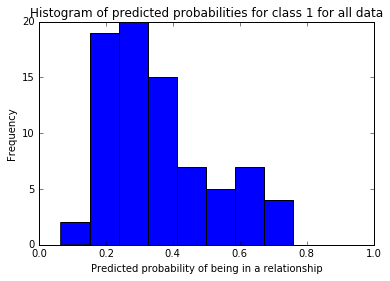

In [26]:
# Let's take a visual look at how much of the students are not in a relationship
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities for class 1 for all data')
plt.xlabel('Predicted probability of being in a relationship')
plt.ylabel('Frequency')

This histogram shows us a huge portion of the data consists of students not being in a relationship (under 0.5). We need to change threshold of 0.5 to adjust sensitivity and specificity to our business problem.

## Confusion Matrix and Related Metrics

In [97]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[46 10]
 [17  6]]


![Confusion Matrix Visual](http://i.imgur.com/dPKLFDT.png?1)

**Sensitivity**: When the actual value is positive, how often is the prediction correct? (also known as recall)

In [100]:
print(metrics.recall_score(y_test, y_pred_class))

0.260869565217


**Specificity**: When the actual value is negative, how often is the prediction correct?

In [102]:
# No actual function within sci-kit learn to calculate this so we must do this manually
confusion = metrics.confusion_matrix(y_test, y_pred_class)

TN = confusion[0,0] # True positive
FP = confusion[0,1] # False positive

print(TN / (TN+FP))

0.821428571429


**Precision**: When a positive value is predicted, how often is the prediction correct?

In [103]:
print(metrics.precision_score(y_test, y_pred_class))

0.375


### What metrics should we focus on?

- Our current objective is to attempt to estimate if a student is in a romantic relationship

**Scenario 1**:
- Recall the Government of Portugal has limited resources meaning the false positives will result in additional expenses for the government (will send more educational packages). They want to curb costs as much as possible. They would prefer more false negatives.
- Optimize for **precision or specificity**

**Scenario 2**:
- The Government of Portugal wants to reach as much students as possible and understand that the costs could potentially go over their budget. They would prefer more false positives.
- Optimize for **sensitivity**



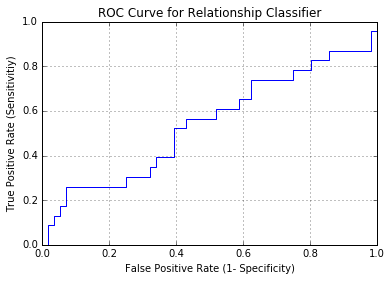

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Relationship Classifier')
plt.xlabel('False Positive Rate (1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivitiy)')
plt.grid(True)

Let us assume the government prefers scenario 1. We want to change the threshold to a higher number that optimizes for **specificity**

In [117]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [152]:
# The default threshold
evaluate_threshold(0.5)

Sensitivity: 0.260869565217
Specificity: 0.928571428571


In [157]:
# Lets change the threshold to 0.65 to see what happens
evaluate_threshold(0.65)

Sensitivity: 0.173913043478
Specificity: 0.928571428571


## Changing the threshold and AUC

In [24]:
# Before we change the threshold, lets see the AUC before the change
print(metrics.roc_auc_score(y_test, y_pred_class))

0.541149068323


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.73      0.82      0.77        56
          1       0.38      0.26      0.31        23

avg / total       0.63      0.66      0.64        79



In [27]:
# Let us change the threshold now to 0.65
from sklearn.preprocessing import binarize
y_pred_class = binarize((np.reshape(y_pred_prob, (1, -1))), 0.65)[0]

In [28]:
print(metrics.roc_auc_score(y_test, y_pred_class))

0.57298136646


In [29]:
# After changing the threshold
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.74      0.93      0.83        56
          1       0.56      0.22      0.31        23

avg / total       0.69      0.72      0.68        79



Our F1-score has improved!

Depending on specific needs, we can tweak our thresholds to match the appropriate results.